## Heart disease project 1

It is a dataset which gives the information on Heart disease rate and predicts the problems based on their medical conditions

thesse are the steps which are going to solve
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


# 1. Problem definition

It is a dataest which predicts the output of Heart disease probable chance of getting or not using their previous medical conditions undergone.

# 2. Data

These are the parameters in this dataset to include for prediction of the result
1.  (age)
2.  (sex)
3.  (cp)
4.  (trestbps)
5.  (chol)
6.  (fbs)
7.  (restecg)
8.  (thalach)
9.  (exang)
10. (oldpeak)
11. (slope)
12. (ca)
13. (thal)


# 3. Evaluation

> If the model is going to perform above or equal 95% accuracy whether the patient is having Heart disease or not, the project is going to be success


# 4. Features

These are the data taken as a sample to predict the Heart disease:
* age
age in years

* sex
sex (1 = male; 0 = female)

* chest pain type (4 values)
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

* resting blood pressure

* serum cholestoral in mg/dl

* fasting blood sugar > 120 mg/dl
(1 = true; 0 = false)

* resting electrocardiographic results (values 0,1,2)
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* maximum heart rate achieved (thalach)

* exercise induced angina
(1 = yes; 0 = no)

* oldpeak = ST depression induced by exercise relative to rest

* the slope of the peak exercise ST segment
Value 1: upsloping
Value 2: flat
Value 3: downsloping

* number of major vessels (0-3) colored by flourosopy

* thal 
3 = normal; 6 = fixed defect; 7 = reversable defect



# preparing tools

Importing all required libraries to perform.

In [45]:
#importing EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as mpt
import seaborn as sns

#graph will be plotted inside the notebook
%matplotlib inline

#importing sci-kit learn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#model evaluation

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

#  Loading the data and doing EDA

1. loading the main data
2. Inspecting basic operations related to data such as info,no. of rows and columns,describe,nullvalues etc
3. plotting and visualizing graphs and charts to analyse of data by comparision within dataset.
4. performing and finding the suitable target variable using EDA.

In [46]:
dt= pd.read_csv('7.1 heart-disease.csv')

In [47]:
dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
dt.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
dt.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
dt.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
dt["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

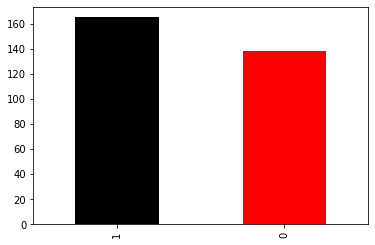

In [11]:
dt["target"].value_counts().plot(kind= 'bar', color= ['black', 'red']);

In [12]:
dt.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
dt.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
pd.crosstab(dt.sex, dt.target)

target,0,1
sex,,
0,24,72
1,114,93


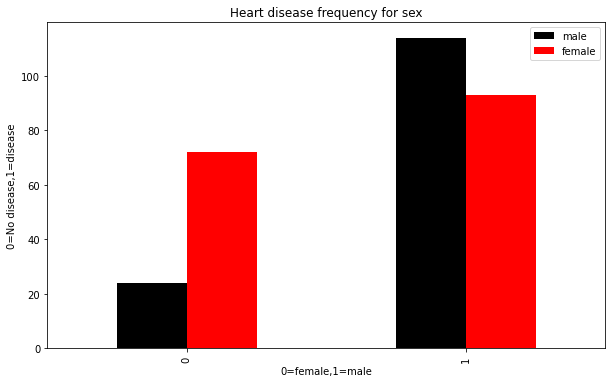

In [15]:
pd.crosstab(dt.sex, dt.target).plot(kind= 'bar',figsize=(10,6),color= ['black','red']);
mpt.title('Heart disease frequency for sex')
mpt.xlabel('0=female,1=male')
mpt.ylabel('0=No disease,1=disease');
mpt.legend(['male', 'female']);

### Age vs Max heart rate disease

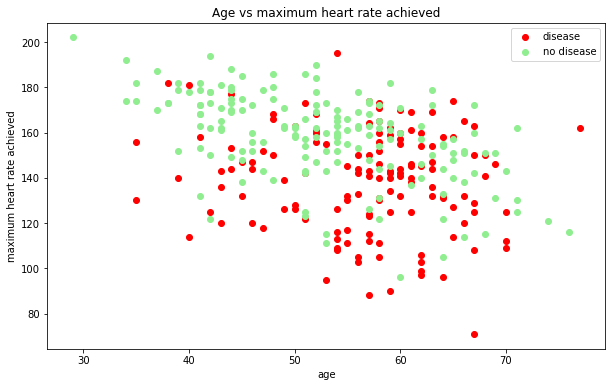

In [16]:
mpt.figure(figsize=(10,6))


#no heart disease
mpt.scatter(dt.age[dt.target==0],
           dt.thalach[dt.target==0],
           color='red');

#heart disease
mpt.scatter(dt.age[dt.target==1],
           dt.thalach[dt.target==1],
           color='lightgreen');

mpt.title('Age vs maximum heart rate achieved')
mpt.xlabel('age')
mpt.ylabel('maximum heart rate achieved')
mpt.legend(['disease', 'no disease']);

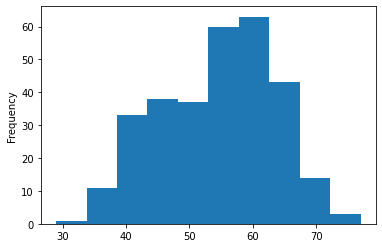

In [17]:
dt.age.plot.hist();

### Heart disease vs chest pain rate
chest pain type (4 values)
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

In [18]:
pd.crosstab(dt.cp, dt.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


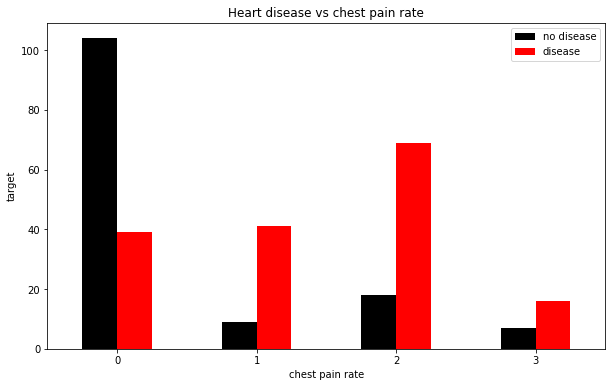

In [19]:
#data visual using crosstab
pd.crosstab(dt.cp, dt.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['black', 'red']);
#labels
mpt.title('Heart disease vs chest pain rate')
mpt.xlabel('chest pain rate')
mpt.ylabel('target')
mpt.legend(['no disease', 'disease'])
mpt.xticks(rotation=0);

In [20]:
dt.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


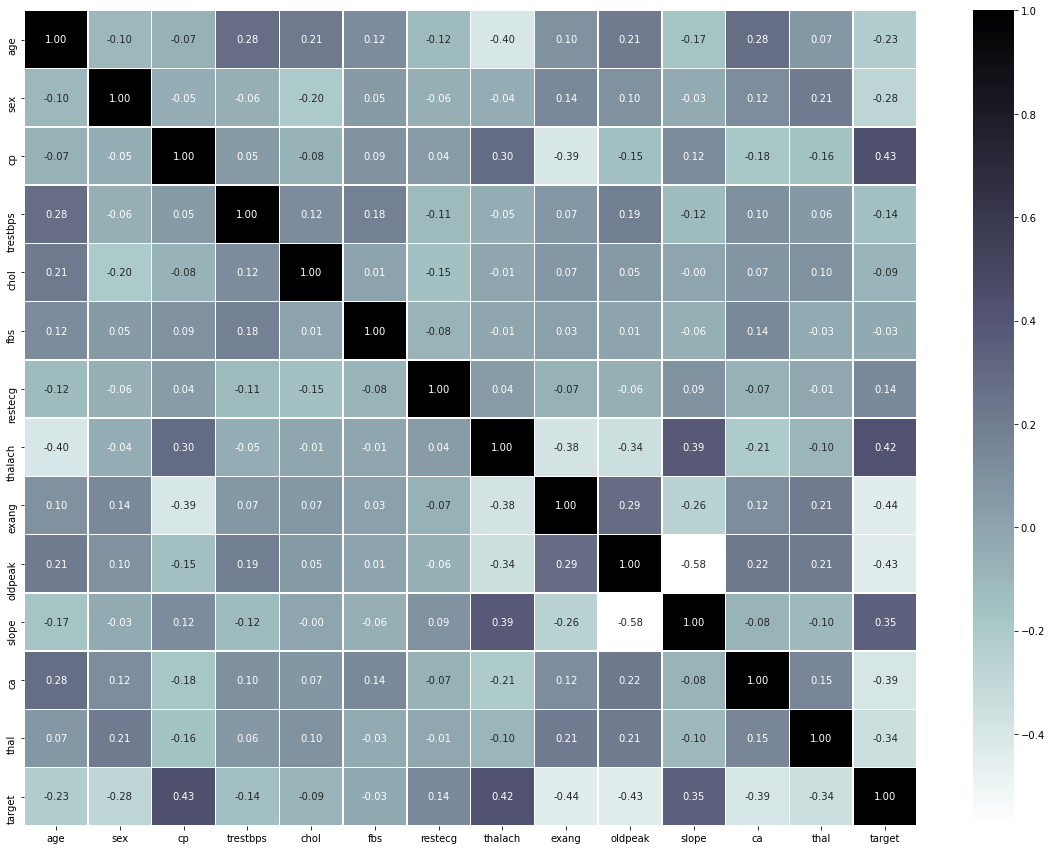

In [21]:
c_mat= dt.corr()
fig, ax=  mpt.subplots(figsize=(20,15))
ax= sns.heatmap(c_mat, annot= True, linewidths=0.5, fmt='.2f', cmap='bone_r')

In [44]:
import sweetviz as sv

In [49]:
myr= sv.analyze(dt)
myr.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 5. Modelling

In [22]:

dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [23]:
#splitting the data into features and target
x=dt.iloc[:,:-1]

In [24]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
y= dt.iloc[:,-1]

In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
np.random.seed(42)

#splitting train and test dataset

X_train,X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [29]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

**data splitting done**

**time to create model for machine lerning**

**train it on the training set**

**test it on the test set**

**We are going to use 3 machine learning models**

1. Logistic Regression
2. KNN neighbors classifiers
3. Random Forest Classifier

In [30]:
#modelling the dataset 

models = {'Random_forest': RandomForestClassifier(),
         'KNN': KNeighborsClassifier(),
         'Logistic regression': LogisticRegression()}

In [31]:
models

{'Random_forest': RandomForestClassifier(),
 'KNN': KNeighborsClassifier(),
 'Logistic regression': LogisticRegression()}

In [42]:
models.items

<function dict.items>

In [32]:
#creating function o fit and score models
#where score defines: score is measuring the accuracy of the model against the training data.

def fit_and_score(models, X_train, X_test, y_train, y_test):
    
#entering the random state to evaluate
    np.random.seed(42)
    
#Scoring value
    model_score={}
    
    #looping through 3 models
    for name, model in models.items():
        model.fit(X_train, y_train)

#evaluating the model and append its score
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [43]:
model_score= fit_and_score(models=models,
             X_train=X_train,
             X_test=X_test,
             y_train=y_train,
             y_test=y_test)

model_score

{'Random_forest': 0.8360655737704918,
 'KNN': 0.6885245901639344,
 'Logistic regression': 0.8852459016393442}

In [34]:
m_compare= pd.DataFrame(model_score, index=['accuracy'])

In [35]:
m_compare

,Random_forest,KNN,Logistic regression
accuracy,0.836066,0.688525,0.885246


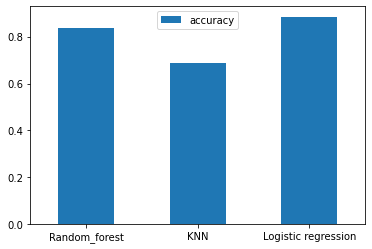

In [36]:
#T indicates the distance b?w 3 bars
m_compare.T.plot.bar();
mpt.xticks(rotation=0);

This is the basic predicted accuracy of machine learning, further evaluating of iteration might give better accuracy
So the following parameters are used for better tuning an accuracy

1. hyperparameter tuning
2. Feature importance
3. confusion matrix
4. cross validation
5. precision
6. recall
7. F1 score
8. classification report
9. ROC curve
10. Area under the curve(AUC)

## Hyperparameter Tuning

In [37]:
#tuning through Knn
train_score= []
test_score= []

#creating neighbors by default it is 5
neighbors = range(1,21)

#setup knn
knn= KNeighborsClassifier()

#looping
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fitting the model
    knn.fit(X_train, y_train)
    
    #updating score
    train_score.append(knn.score(X_train, y_train))
    
    test_score.append(knn.score(X_test, y_test))
    
        


In [38]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [39]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

KNN neigbors maximum accuracy score: 75.41%


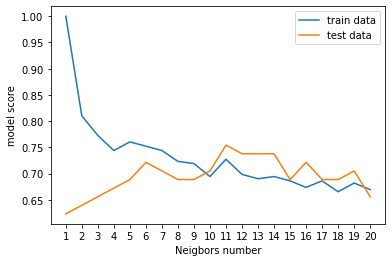

In [40]:
mpt.plot(neighbors, train_score, label="train data")
mpt.plot(neighbors, test_score, label= "test data")
mpt.xticks(np.arange(1,21,1))
mpt.xlabel('Neigbors number')
mpt.ylabel('model score')
mpt.legend()

print(f"KNN neigbors maximum accuracy score: {max(test_score)*100:.2f}%")

In [41]:
(dt==0).sum()

age           0
sex          96
cp          143
trestbps      0
chol          0
fbs         258
restecg     147
thalach       0
exang       204
oldpeak      99
slope        21
ca          175
thal          2
target      138
dtype: int64

age
age in years

* sex
sex (1 = male; 0 = female)

* chest pain type (4 values)
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

* resting blood pressure

* serum cholestoral in mg/dl

* fasting blood sugar > 120 mg/dl
(1 = true; 0 = false)

* resting electrocardiographic results (values 0,1,2)
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* maximum heart rate achieved (thalach)

* exercise induced angina
(1 = yes; 0 = no)

* oldpeak = ST depression induced by exercise relative to rest

* the slope of the peak exercise ST segment
Value 1: upsloping
Value 2: flat
Value 3: downsloping

* number of major vessels (0-3) colored by flourosopy

* thal 
3 = normal; 6 = fixed defect; 7 = reversable defect